## **Ejercicio 1: Procesamiento de Imágenes en Escala de Grises**

Vas a trabajar con una imagen en escala de grises representada por una matriz de tamaño 100x100. Cada valor en esta matriz es un número entre 0 y 255, donde 0 representa negro absoluto y 255 blanco absoluto, con tonos de gris intermedios entre ambos valores. Tu tarea será:

1. Generar una imagen inicial de tamaño 100x100 con valores aleatorios.
2. Aumentar la intensidad de los píxeles de la imagen, sin exceder el valor máximo permitido (255).
3. Aplicar una técnica de procesamiento de imágenes llamada **convolución** para implementar un filtro de detección de bordes, y analizar el resultado.

### **Parte 1: Generación de la Imagen**

Primero, genera una matriz de 100x100 con valores aleatorios entre 0 y 255 para simular la imagen en escala de grises.

Para poder visualizar la imagen, debes usar la librería matplotlib, utiliza/adapta el siguiente código:

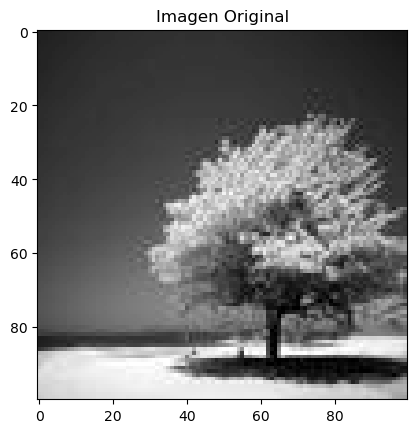

In [77]:
#Tu código aquí
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

#Generar la imagen en escala de grises (100x100)
#imagen = np.random.randint(0, 256, size=(100, 100))

#Generar imagen con una diagonal
#imagen = np.identity(100)*255

#Leer la imagen desde un archivo
imagen = mpimg.imread('img100x100.jpg')

# Mostrar la imagen original
plt.imshow(imagen, cmap='gray')
plt.title("Imagen Original")
plt.show()

### **Parte 2: Aumento de Intensidad**

Incrementa la intensidad de los píxeles sumando un valor constante (por ejemplo, 50) a todos los elementos de la matriz. Asegúrate de que los valores no excedan el máximo de 255. Esto se puede hacer recorriendo cada valor de la matriz y verificando que el resultado se mantenga dentro del rango permitido.

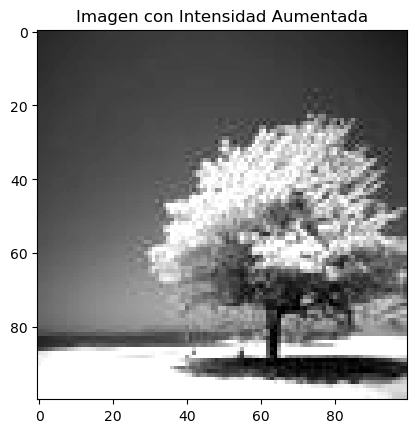

In [78]:
#Tu código aquí
#Aumentar la intensidad de los píxeles

def aumentar_intensidad(imagen, incremento):
    # Crear una copia de la imagen original
    imagen_modificada = np.zeros_like(imagen)
    
    # Obtener dimensiones de la imagen
    filas, columnas = imagen.shape
    
    # Recorrer la imagen y aplicar el incremento de intensidad
    for i in range(filas):
        for j in range(columnas):
            nuevo_valor = imagen[i, j] + incremento
            # Limitar los valores a un máximo de 255 y un mínimo de 0
            if nuevo_valor > 255:
                imagen_modificada[i, j] = 255
            elif nuevo_valor < 0:
                imagen_modificada[i, j] = 0
            else:
                imagen_modificada[i, j] = nuevo_valor
    
    return imagen_modificada

# Aumentar la intensidad en 50
imagen_modificada = aumentar_intensidad(imagen, 50)

# Mostrar la imagen modificada
plt.imshow(imagen_modificada, cmap='gray')
plt.title("Imagen con Intensidad Aumentada")
plt.show()

### **Parte 3: Detección de Bordes usando Convolución**

La convolución es una operación fundamental en el procesamiento de imágenes. Básicamente, es un proceso que toma una matriz llamada kernel o filtro y la "desliza" sobre la imagen original. Para cada posición del filtro sobre la imagen, se multiplica cada valor en la vecindad de la imagen por el correspondiente valor en el filtro, y luego se suman los resultados. El valor resultante se coloca en la nueva imagen procesada.

Aquí tienes un ejemplo gráfico que ilustra cómo funciona la convolución:

<img src="kernel_borde.png" width="600">

En este ejercicio, utilizarás un filtro Sobel para detectar bordes en la dirección horizontal. Este filtro tiene la siguiente forma:

<img src="sobel_x.png" width="200">

Cuando aplicamos este filtro a una imagen, destacamos los cambios abruptos en la intensidad de los píxeles, que típicamente corresponden a bordes o contornos en la imagen.

<img src="sobel_resultado.jpg" width="300">

**Pasos Detallados para Implementar la Convolución**

**1. Posicionar el filtro en la imagen**: Comienza colocando el filtro en la esquina superior izquierda de la imagen.

**2. Multiplicar y sumar**: Para cada posición del filtro, multiplica cada valor del filtro por el valor correspondiente de la imagen (usando una ventana del tamaño del filtro), y luego suma los resultados.

**3. Deslizar el filtro**: Mueve el filtro a través de la imagen (de izquierda a derecha y de arriba a abajo) hasta cubrir toda la matriz.

**4. Asignar el valor resultante**: Coloca el valor obtenido en la nueva imagen procesada.

**5. Limitar valores**: Asegúrate de que los valores de la imagen resultante se mantengan dentro del rango [0, 255].

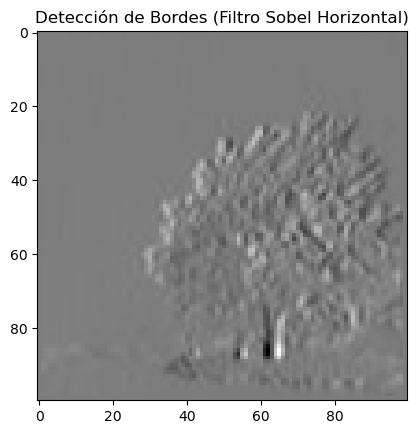

In [79]:
#Tu código aquí
# Implementar la convolución utilizando filtro de Sobel

def convolucion(imagen, kernel):
    filas, columnas = imagen.shape
    # Crear una imagen resultante del mismo tamaño
    imagen_resultante = np.zeros((filas, columnas))
    # Tamaño del kernel
    k = kernel.shape[0] // 2
    
    # Aplicar la convolución
    for i in range(k, filas - k):
        for j in range(k, columnas - k):
            # Extraer la región de la imagen que coincide con el kernel
            region = imagen[i-k:i+k+1, j-k:j+k+1]
            # Realizar la multiplicación de la región por el kernel y sumar
            imagen_resultante[i, j] = np.sum(region * kernel)
    
    return imagen_resultante

# Definir el filtro de Sobel
sobel_horizontal = np.array([[-1, 0, 1], 
                             [-2, 0, 2], 
                             [-1, 0, 1]])

# Aplicar la convolución usando el filtro Sobel horizontal (bordes verticales)
bordes = convolucion(imagen, sobel_horizontal)

# Mostrar las imágenes procesadas
plt.imshow(bordes, cmap='gray')
plt.title("Detección de Bordes (Filtro Sobel Horizontal)")
plt.show()

## **Análisis de Resultados:**

**Aumento de Intensidad:** ¿Qué ocurre cuando aumentas la intensidad de los píxeles en la imagen? ¿Notas alguna área sobresaturada o con pérdida de detalles?

**Detección de Bordes:** Compara la imagen original con la procesada. ¿Qué detalles aparecen en la imagen con detección de bordes que no eran evidentes en la original? ¿Qué estructuras o contornos se destacan?

Tus Respuestas aca:

**Aumento de Intensidad:**

Cuando aumenta la intensidad de los píxeles en la imagen, lo que ocurre es que los tonos de gris de la imagen original se hacen más claros, acercándose más a los valores máximos (255). Esto provoca que las áreas más brillantes de la imagen se saturen, lo que significa que esas regiones alcanzan el valor máximo de 255 y pierden detalle, apareciendo como zonas completamente blancas.

* Sobresaturación: Si una gran parte de los píxeles alcanza el valor 255, se pierde la información de esos detalles, ya que todos los píxeles sobresaturados se convierten en blanco puro.

* Pérdida de detalles: Esto suele ocurrir en áreas que ya eran brillantes antes de aumentar la intensidad. Estos detalles pueden desaparecer porque el rango de tonos se ha comprimido hacia el extremo más alto (255).

**Detección de Bordes:**

Al aplicar el filtro de detección de bordes (Sobel), se resalta cualquier cambio brusco en la intensidad de los píxeles, lo que permite visualizar mejor los contornos y las transiciones entre distintas áreas de la imagen.

* Detalles nuevos: En la imagen procesada, aparecen los contornos de las estructuras que tienen contrastes fuertes entre áreas adyacentes. Los bordes permiten identificar formas y detalles que pueden haber sido difíciles de ver en la imagen original.

* Estructuras y contornos destacados: Las líneas o zonas donde hay una transición abrupta de oscuro a claro (o viceversa) son las más prominentes. Los bordes de objetos o cambios de textura en la imagen quedan marcados, destacando las formas de los objetos presentes en la imagen. Este proceso es especialmente útil para identificar los límites de formas dentro de la imagen, algo crucial en aplicaciones de reconocimiento o análisis de imágenes.

## **Ejercicio 2: Aplicación Básica de Álgebra Lineal**

Imagina que tienes un conjunto de vectores que representan las fuerzas en un sistema de 3 dimensiones. Estos vectores están en una matriz de tamaño 3x3, donde cada fila es un vector de fuerzas. Implementa las funciones que permiten realizar las siguientes operaciones:

1. Calcular la magnitud de cada vector.

2. Encontrar el vector suma que representa la fuerza resultante en el sistema.

3. Normalizar cada vector (es decir, hacer que su longitud sea 1).

In [80]:
#tu código aquí
import numpy as np

# Matriz de fuerzas (cada fila es un vector)
fuerzas = np.array([[3, 4, 0], [1, 1, 1], [0, 0, 5]])

# Calcular la magnitud de cada vector
def calcular_magnitud(v):
    return np.sqrt(np.sum(v**2))

magnitudes = np.array([calcular_magnitud(fuerza) for fuerza in fuerzas])

# Mostrar resultados
print("Magnitudes de los vectores:", magnitudes)

Magnitudes de los vectores: [5.         1.73205081 5.        ]


In [81]:
# Calcular el vector suma (fuerza resultante)
fuerza_resultante = np.sum(fuerzas, axis=0)

#Mostra resultados
print("Fuerza resultante:", fuerza_resultante)

Fuerza resultante: [4 5 6]


In [82]:
# Normalizar cada vector
def normalizar_vector(v, magnitud):
    if magnitud != 0:
        return v / magnitud
    else:
        return v

fuerzas_normalizadas = np.array([normalizar_vector(fuerza, magnitudes[i]) for i, fuerza in enumerate(fuerzas)])

#Mostrar resultados
print("Vectores normalizados:\n", fuerzas_normalizadas)

Vectores normalizados:
 [[0.6        0.8        0.        ]
 [0.57735027 0.57735027 0.57735027]
 [0.         0.         1.        ]]


## **Ejercicio 3: Análisis de Ventas**

Tienes un registro de ventas en diferentes meses del año en un formato de lista de tuplas. Cada tupla contiene el mes (en formato de cadena "YYYY-MM") y el total de ventas (un número). El objetivo es:

1. Convertir este registro en una estructura de datos Numpy o Pandas.
2. Encontrar el mes con las mayores ventas.
3. Calcular la media de ventas para el período.
4. Visualizar la tendencia de ventas mediante un gráfico.

**Instrucciones**: Puedes elegir si deseas usar Numpy o Pandas para resolver este ejercicio. Se espera que analices las tendencias y comentes sobre los resultados obtenidos

Para graficar las tendecias de ventas usando **numpy**, utiliza el siguiente código:

In [83]:
import numpy as np
import matplotlib.pyplot as plt

ventas = [("2023-01", 150), ("2023-02", 200), ("2023-03", 250), 
                   ("2023-04", 175), ("2023-05", 300), ("2023-06", 225)]

# Convertir la lista de tuplas a un array de numpy
ventas = np.array(ventas)

# Separar los meses y las ventas en arrays diferentes
meses = ventas[:, 0]
ventas_totales = ventas[:, 1].astype(float)

print(meses)
print(ventas_totales)

['2023-01' '2023-02' '2023-03' '2023-04' '2023-05' '2023-06']
[150. 200. 250. 175. 300. 225.]


In [84]:
# Encontrar el mes con mayores ventas
max_ventas = ventas_totales[0]  # Inicializamos con el primer valor de ventas
mes_max_ventas = meses[0]       # Inicializamos con el primer mes

# Recorrer el array manualmente para encontrar el valor máximo
for i in range(1, len(ventas_totales)):
    if ventas_totales[i] > max_ventas:
        max_ventas = ventas_totales[i]
        mes_max_ventas = meses[i]

print("Mes con mayores ventas:", mes_max_ventas, "con un total de", max_ventas)

Mes con mayores ventas: 2023-05 con un total de 300.0


In [85]:
# Calcular la media de ventas
media_ventas = np.mean(ventas_totales)

print("Promedio de ventas:", media_ventas)

Promedio de ventas: 216.66666666666666


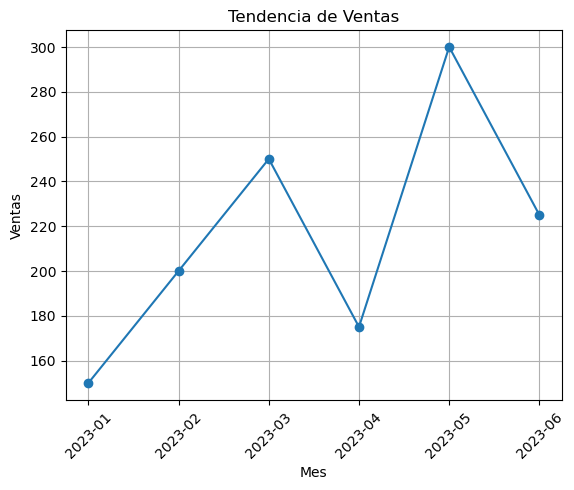

In [86]:
# Graficar la tendencia de ventas
plt.plot(meses, ventas_totales, marker='o')
plt.title('Tendencia de Ventas')
plt.xlabel('Mes')
plt.ylabel('Ventas')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

Para graficar las tendecias de ventas usando **pandas**, utiliza el siguiente código:

In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Datos de ventas
ventas = [("2023-01", 150), ("2023-02", 200), ("2023-03", 250), ("2023-04", 175), 
          ("2023-05", 300), ("2023-06", 225)]

# Convertir a estructura de datos en pandas
df_ventas = pd.DataFrame(ventas, columns=["Mes", "Ventas"])

print(df_ventas)

       Mes  Ventas
0  2023-01     150
1  2023-02     200
2  2023-03     250
3  2023-04     175
4  2023-05     300
5  2023-06     225


In [88]:
# Encontrar el mes con mayores ventas
max_ventas = df_ventas["Ventas"][0]  # Inicializamos con el primer valor de ventas
mes_max_ventas = df_ventas["Mes"][0]  # Inicializamos con el primer mes

# Recorrer el DataFrame manualmente para encontrar el valor máximo
for i in range(1, len(df_ventas)):
    if df_ventas["Ventas"][i] > max_ventas:
        max_ventas = df_ventas["Ventas"][i]
        mes_max_ventas = df_ventas["Mes"][i]

print("Mes con mayores ventas:", mes_max_ventas, "con un total de", max_ventas)

Mes con mayores ventas: 2023-05 con un total de 300


In [89]:
# Paso 3: Calcular la media de ventas
media_ventas = df_ventas["Ventas"].mean()

print("Promedio de ventas:", media_ventas)

Promedio de ventas: 216.66666666666666


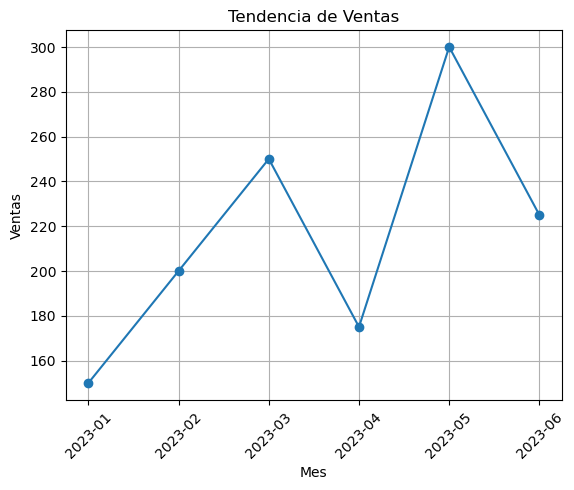

In [90]:
# Paso 4: Graficar la tendencia de ventas
plt.plot(df_ventas["Mes"], df_ventas["Ventas"], marker='o')
plt.title('Tendencia de Ventas')
plt.xlabel('Mes')
plt.ylabel('Ventas')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()